# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-основных-параметров.-Поиск-и-устранение-редких-и-выбивающихся-значений." data-toc-modified-id="Изучение-основных-параметров.-Поиск-и-устранение-редких-и-выбивающихся-значений.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение основных параметров. Поиск и устранение редких и выбивающихся значений.</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Исследование-стоимости-помещений-в-населенных-пунктах-с-наибольшим-количеством-объявлений." data-toc-modified-id="Исследование-стоимости-помещений-в-населенных-пунктах-с-наибольшим-количеством-объявлений.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Исследование стоимости помещений в населенных пунктах с наибольшим количеством объявлений.</a></span></li><li><span><a href="#Исследование-параметров-квартир,-расположенных-в-Санкт-Петербурге-и-его-центре" data-toc-modified-id="Исследование-параметров-квартир,-расположенных-в-Санкт-Петербурге-и-его-центре-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование параметров квартир, расположенных в Санкт-Петербурге и его центре</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4592,10,14100000.0,109.2,2017-05-22T00:00:00,4,3.27,6.0,69.3,4,NaN,...,18.3,1.0,Санкт-Петербург,25830.0,4624.0,0.0,NaN,2.0,930.0,308.0
21892,1,5890000.0,58.0,2015-12-17T00:00:00,2,NaN,20.0,29.0,13,False,...,12.0,2.0,Санкт-Петербург,15376.0,13485.0,0.0,NaN,1.0,591.0,1006.0
19127,9,4000000.0,57.0,2017-11-09T00:00:00,2,3.20,4.0,27.0,1,NaN,...,20.0,1.0,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,137.0
4764,8,4500000.0,44.0,2018-09-20T00:00:00,1,NaN,22.0,16.0,18,NaN,...,14.0,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,29.0
16677,8,8200000.0,79.0,2016-02-18T00:00:00,2,NaN,16.0,41.8,12,NaN,...,22.5,2.0,Санкт-Петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,267.0
4288,20,5000000.0,65.0,2017-04-20T00:00:00,2,2.70,17.0,33.3,2,NaN,...,15.0,0.0,Санкт-Петербург,16087.0,14883.0,0.0,NaN,0.0,NaN,187.0
5453,5,4790000.0,41.4,2018-10-28T00:00:00,1,2.60,16.0,NaN,14,NaN,...,NaN,NaN,Санкт-Петербург,52239.0,16464.0,0.0,NaN,1.0,754.0,164.0
15503,16,9990000.0,91.0,2017-03-01T00:00:00,3,2.70,13.0,57.3,12,NaN,...,9.8,1.0,Санкт-Петербург,15395.0,13936.0,2.0,736.0,0.0,NaN,371.0
8021,13,6200000.0,68.0,2018-08-01T00:00:00,3,2.70,12.0,44.0,7,NaN,...,9.0,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,237.0
2475,4,2000000.0,27.0,2018-09-07T00:00:00,0,2.60,17.0,17.0,1,NaN,...,NaN,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,131.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски имеются в 14 столбцах.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Исследуемые данные о рынке недвижимости в Санкт-Петербурге и Ленинградской области представляют собой таблицу, состоящую из 23699 строк и 22 столбцов, содержащих различные типы данных. Только 8 столбцов таблицы заполнены полностью и не содержат пропусков. Для подготовки данных к работе с ними нам предстоить устранить пропуски и аномальные значения, изменить типы данных в интересующих нас столбцах, исходя из поставленных перед исследованием задач. 

## Предобработка данных

In [6]:
data.dropna(subset=['locality_name'], inplace=True)

Удаляем пропуски в стобце с названиями местности. Их количество невелико, а значимость этих данных высока.

In [7]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Приведем в порядок названия населенных пунктов заменив все "ё" в их названиях на "е".

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
data['ceiling_height'].isna().sum()

106

Пропуски в данных о высоте потолков заменим медианными значениями, сгруппировав по местонахождению данных квартир.

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Для оставшихся 106, с уникальными данными о местонахождении, заменим пропуски общим медианным значением.

In [10]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
data['cityCenters_nearest'].isna().sum()

4864

В столбце с расстоянием до центра города удалось заполнить лишь небольшую часть пропусков. Запонлять оставшиеся почти пять тысяч пропусков медианным значением было бы некорректно, тем более данные в этом столбце очень разносторонние.

In [11]:
data.dropna(subset=['floors_total'], inplace=True)

Удалим 85 строк с пропущенными значениями об этажности зданий.

In [12]:
data['balcony'] = data['balcony'].fillna(0)

Предположив, что пропуски в данных о количестве балконов указывают на их отсутствие, заменим их на 0.

In [13]:
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].transform('median'))
data['living_area'].isna().sum()

133

Заменяем пропущенные данные о жилой площади, сгруппироваными по общей площади, медианными значениями. Оставшиеся пропуски удалять не будем, попробуем придумать для них что-то другое.

In [14]:
median_ratio_living_total = (data['living_area'] / data ['total_area']).median()
median_ratio_living_total

0.5709677419354838

Высчитаем медианное соотношение жилой и общей площади.

In [15]:
def living_area_from_median_ratio(row):
    living = row['living_area']
    total = row['total_area']
    
    if living > 0:
        return living
    return total * median_ratio_living_total


data['living_area'] = data.apply(living_area_from_median_ratio, axis=1)

Создаем функцию, которая заменяет пропущенные значения жилой площади произведением общей площади и, полученой ранее, медианой соотношения этих площадей.

In [16]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))
data['kitchen_area'].isna().sum()

185

In [17]:
median_ratio_kitchen_total = (data['kitchen_area'] / data ['total_area']).median()
median_ratio_kitchen_total

0.1713505331051731

In [18]:
def kitchen_area_from_median_ratio(row):
    kitchen = row['kitchen_area']
    total = row['total_area']
    
    if kitchen > 0:
        return kitchen
    return total * median_ratio_kitchen_total


data['kitchen_area'] = data.apply(kitchen_area_from_median_ratio, axis=1)

С пропусками в значениях площади кухни поступаем аналогично пропускам в жилой площади.

### Изменение типов данных

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Информацию о дате публикации объявления переформатируем во временной формат.

In [20]:
data['last_price'] = data['last_price'].astype('int')
data['rooms'] = data['rooms'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['floor'] = data['floor'].astype('int')
data['balcony'] = data['balcony'].astype('int')

Изменим типы данных в столбцах без пропусков и данных, не подразумевающих дробные значения, на целые числа.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Вывод

В большей части столбцов теперь отсутствуют пропуски. При предобработке данных, удалено всего 134 строки, что составило всего 0.56% от изначального количества. Удаление незначительной части данных с пропусками отобразится на результатах исследования менее негативно, чем замена пропусков медианными значениями. Изменение типов данных в столбцах содержащих целые числа обеспечит комфорт при работе с данными, отрезав от чисел "дробные хвосты", а для того, чтобы работать с датами, а не с числами, похожими на даты, мы присвоили соответствующему столбцу необходимый тип данных.

## Расчёты и добавление результатов в таблицу

In [22]:
data['price_per_m2'] = data['last_price'] / data ['total_area']

Добавим столбец с расчетами стоимости квадратного метра.

In [23]:
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data['weekday'] = data['first_day_exposition'].dt.weekday

Создадим и добавим в таблицу столбцы содержащие информацию о годе, месяце и дне недели публикации объявления о продаже.

In [24]:
def floor_categorization(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    
    if floor == floors_total:
        return 'последний'

    return 'другой'

data['floor_cat'] = data.apply(floor_categorization, axis=1)
data['floor_cat'].value_counts()

другой       17326
последний     3330
первый        2909
Name: floor_cat, dtype: int64

Категоризируем данные об этажах и добавим эти данные в новый столбец.

In [25]:
data['living_to_total_ratio'] = data['living_area'] / data ['total_area']
data['kitchen_to_total_ratio'] = data['kitchen_area'] / data ['total_area']

Вычисляем сотношение жилой и кухонной площадей к общей площади.

### Вывод

В данном разделе были произведены вычесления, результаты которых добавлены в таблицу, в соответствии с поставленными перед исследованием задачами.

## Исследовательский анализ данных

### Изучение основных параметров. Поиск и устранение редких и выбивающихся значений.

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

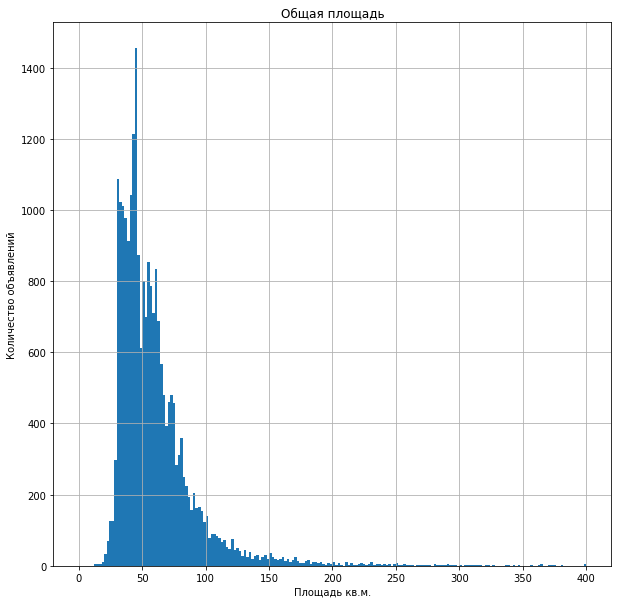

In [26]:
data['total_area'].plot(kind='hist', bins=200, range = (0, 400), figsize = (10, 10), grid=True, title='Общая площадь')
plt.xlabel('Площадь кв.м.')
plt.ylabel('Количество объявлений')
data['total_area'].describe()

In [27]:
data['total_area'].quantile(0.95)

116.0

Как можно увидеть из графика, основная часть продаваемых помещений имеет площадь менее 100 кв.м. При этом, среднее значение - 60 кв.м., а медиана - 52 кв.м. Среднее значение завышается наличием в исследуемых данных помещений с очень большой квадратурой (максимальное значение - 900 кв.м.). Несмотря на то, что эти данные нельзя считать аномальными, во избежание искажения основных показателей, установим 95%-й перцентиль для того, чтобы впоследствии избавиться от оставшихся 5% объвявлений с очень большой квадратурой. 

,price_per_m2
count,23565
mean,99406
std,50389
min,112
25%,76566
50%,95000
75%,114213
max,1907500


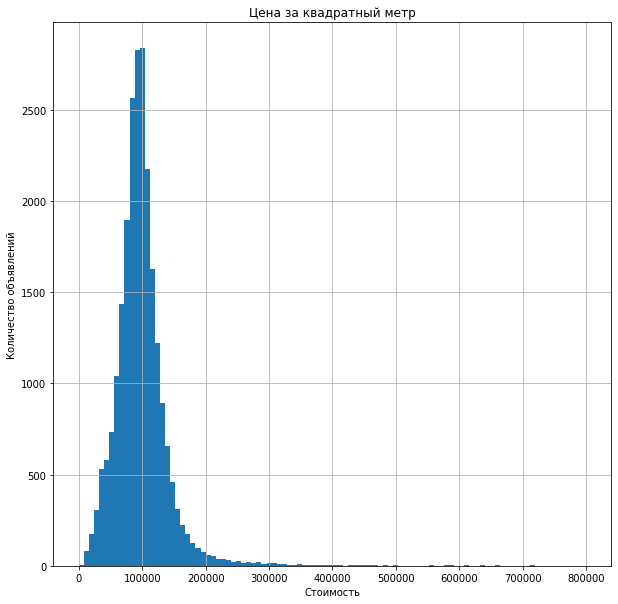

In [28]:
data['price_per_m2'].plot(kind='hist', bins=100, range = (0, 800000), figsize = (10, 10), grid=True, title='Цена за квадратный метр')
plt.xlabel('Стоимость')
plt.ylabel('Количество объявлений')
data[['price_per_m2']].describe().style.format({'price_per_m2': '{:.0f}'})

In [29]:
data['price_per_m2'].quantile(0.95)

160714.2857142857

Стоимость квадратного метра практически всех представленных на продажу помещений не превышает 200 тысяч. Средние и медианные показатели практически равны и держатся на уровне 95 - 99 тысяч. Значения в 95% представленных данных не превышают 161 тысячу за квадратный метр.

,last_price
count,23565.0
mean,6540058.3
std,10910934.7
min,12190.0
25%,3400000.0
50%,4646000.0
75%,6790000.0
max,763000000.0


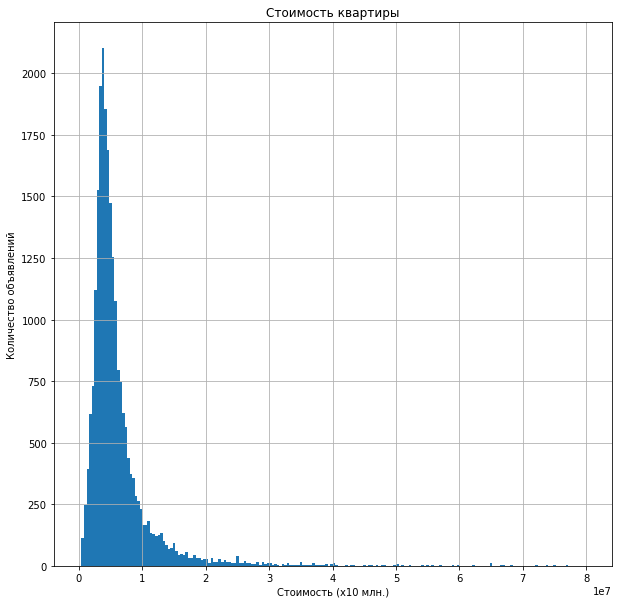

In [30]:
data['last_price'].plot(kind='hist', bins=200, range = (0, 80000000), figsize = (10, 10), grid=True, title='Стоимость квартиры')
plt.xlabel('Стоимость (х10 млн.)')
plt.ylabel('Количество объявлений')
data[['last_price']].describe().style.format({'last_price': '{:.1f}'})

In [31]:
data['last_price'].quantile(0.95)

15300000.0

На полученной гистограмме мы видим, что основная часть объявлений о продаже помещений стоимостью ниже 10 млн. Среднее значение - 6.5 млн, медиана - 4.6 млн. Сдвиг среднего к более высоким значениям вызван наличием в данных очень дорогих помещений. 95% значений менее - 15.3 млн.

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

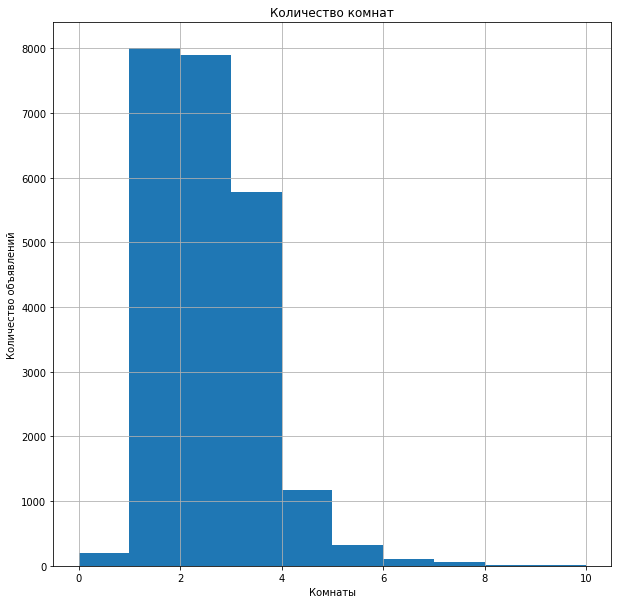

In [32]:
data['rooms'].plot(kind='hist', bins=10, range = (0, 10), figsize = (10, 10), grid=True, title='Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество объявлений')
data['rooms'].describe()

In [33]:
data['rooms'].quantile(0.95)

4.0

Превалирующая часть продаваемых помещений имеют от 1й до 3х комнат из-за чего среднее и медианна в данном случае солидарны и выдают показатели в 2 комнаты. Вычислим какие данные находятся в пределах 95%-й квантили.

count    23565.000000
mean         2.732308
std          1.004402
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

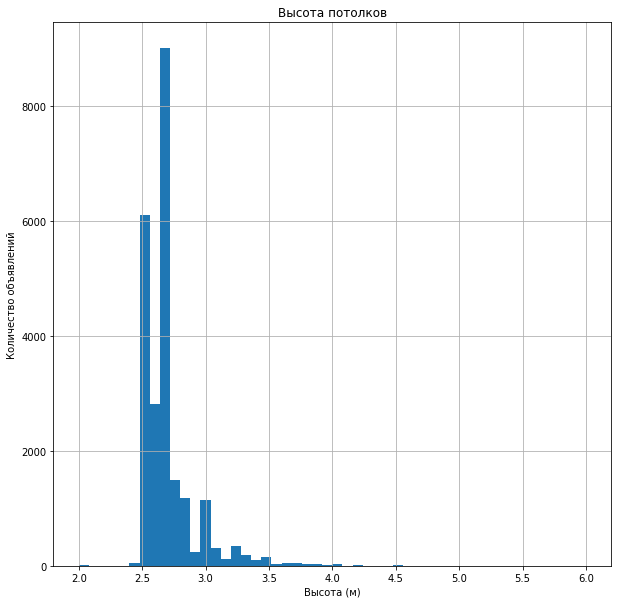

In [34]:
data['ceiling_height'].plot(kind='hist', bins=50, range = (2, 6), figsize = (10, 10), grid=True, title='Высота потолков')
plt.xlabel('Высота (м)')
plt.ylabel('Количество объявлений')
data['ceiling_height'].describe()

In [35]:
data['ceiling_height'].quantile(0.95)

3.15

Среднее и медианна высоты потолков - 2.7 метра, практически все данные о высоте потолков заключены в рамки от 2.5 до 3 метров. Лишь 5% всех данных (в которых даже есть 100-метровая высота потолков) имеют значения выше 3.15 метров.

,days_exposition
count,20394
mean,181
std,220
min,1
25%,45
50%,95
75%,231
max,1580


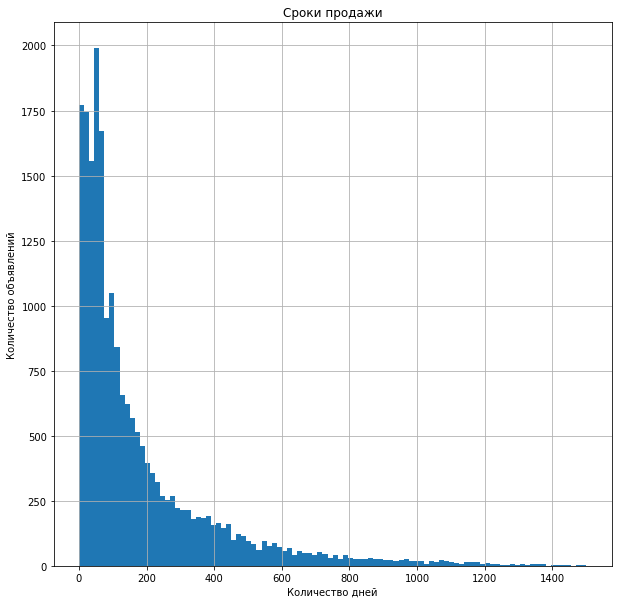

In [36]:
data['days_exposition'].plot(kind='hist', bins=100, range = (0, 1500), figsize = (10, 10), grid=True, title='Сроки продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
data[['days_exposition']].describe().style.format({'days_exposition': '{:.0f}'})

In [37]:
data['days_exposition'].quantile(0.95)

647.3499999999985

Среднее число дней, за которое осуществляется продажа квартиры - 181, медианное - 95 дней. 95% продаж было осуществлено менее чем за 647 дней.

In [38]:
data_1 = data.query('total_area <= 116 \
                    and price_per_m2 <= 161000 \
                    and last_price <= 15300000 \
                    and rooms <= 4 \
                    and ceiling_height <= 3.15 \
                    and days_exposition <= 647')

Создадим новый датафрейм, исключающий 5% высоких значений в исследованых столбцах.

### Факторы, влияющие на стоимость квартиры

0.7489337143556062

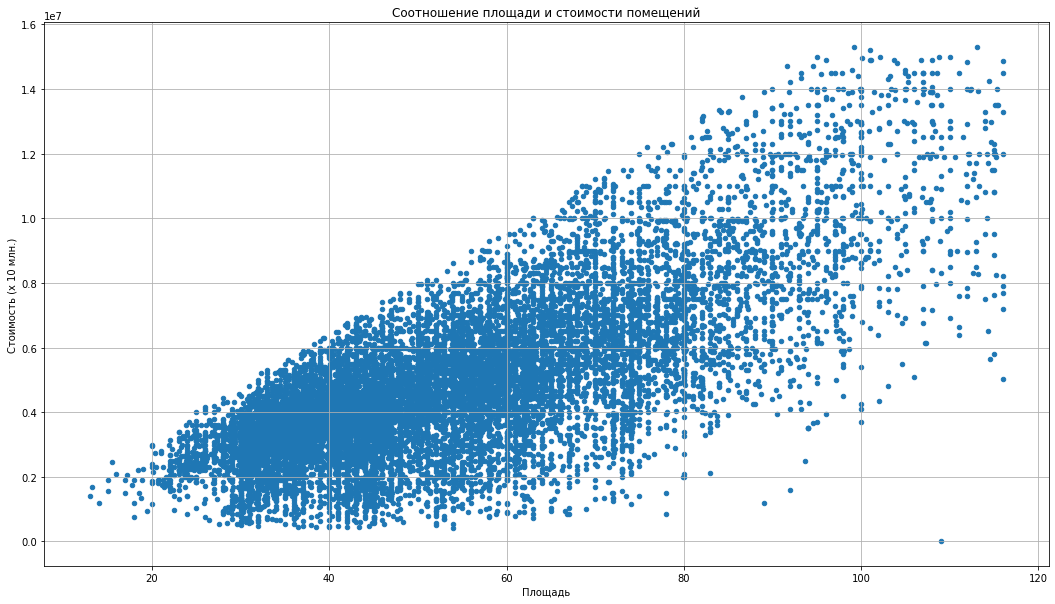

In [39]:
data_1.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(18,10), title='Соотношение площади и стоимости помещений')
plt.xlabel('Площадь')
plt.ylabel('Стоимость (х 10 млн.)')
data_1['total_area'].corr(data_1['last_price'])

На данном графике четко прослеживается зависимость стоимости квартиры от ее площади, несмотря на то, что имеется небольшое количество отклоняющихся значений. Корреляция в 0,75 подтверждает увиденную на графике взаимосвязь между выбранными параметрами.

0.4702101042722249

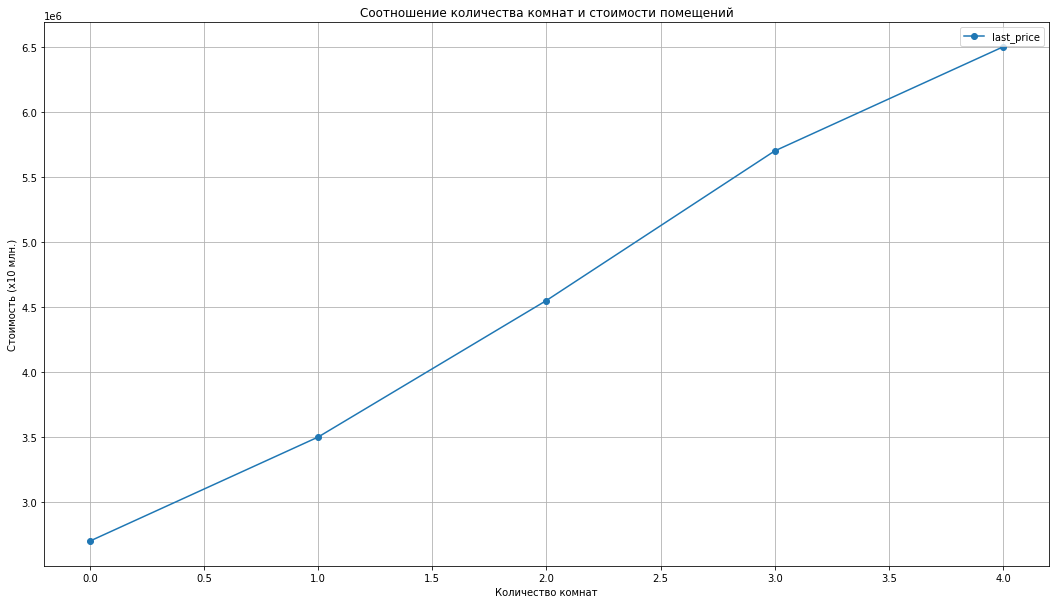

In [40]:
data_1.pivot_table(
    index='rooms', values='last_price', aggfunc='median').plot(
    style='o-',
    grid=True, 
    figsize=(18,10), 
    title='Соотношение количества комнат и стоимости помещений')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость (х10 млн.)')
data_1['rooms'].corr(data_1['last_price'])

Взаимосвязь между количеством комнат и стоимостью помещения очевидна. Хотя корреляция в 0.5 говорит о средней степени связи этих показателей.

-0.33014998581993216

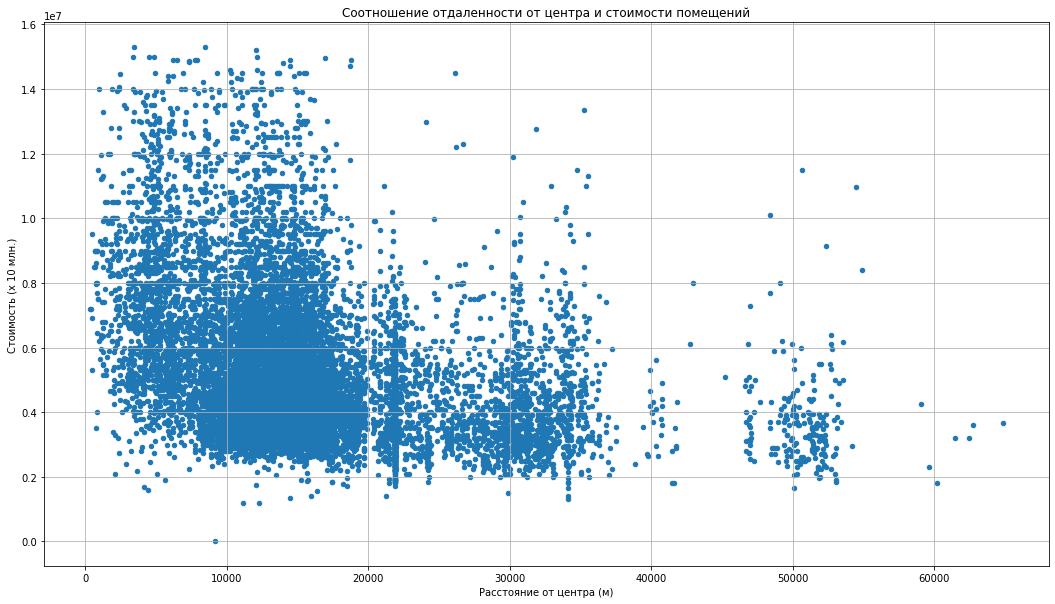

In [41]:
data_1.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, figsize=(18,10), title='Соотношение отдаленности от центра и стоимости помещений')
plt.xlabel('Расстояние от центра (м)')
plt.ylabel('Стоимость (х 10 млн.)')
data_1['cityCenters_nearest'].corr(data_1['last_price'])

На данном графике можно обратить внимание, на скопление показателей в зоне до 20 км, что вызвано наличием в данных почти половины объявлений о продаже недвижимости в Санкт-Петербурге. Также можно проследить тенденцию к снижению стоимости в зависимости от отдаленности от центра. Белые пятна, а также прямые линии значений вызваны наличием пропусков и заменой медианными значениеями в данном столбце.

0.15812464000221774

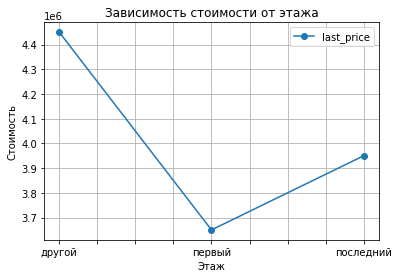

In [42]:
# Категория этажа
data_1.pivot_table(index='floor_cat', values='last_price', aggfunc='median').plot(style='o-', grid=True, title='Зависимость стоимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость')
data_1['floor'].corr(data_1['last_price'])

Зависимость стоимости помещения от его этажа предсказуема - первые и последние этажи дешевле остальных почти на 800 и 500 тысяч соответственно. Корреляция в 0.15 невысока из-за наличия большого количества факторов влияющих на стоимость помещения.

-0.01423704753956427

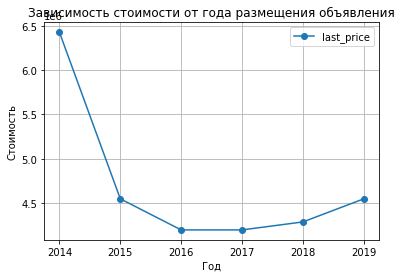

In [43]:
#Год объявления
data_1.pivot_table(index='year', values='last_price', aggfunc='median').plot(style='o-', grid=True, title='Зависимость стоимости от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Стоимость')
data_1['year'].corr(data_1['last_price'])

Стоимость помещений значительно снизилась в 2015 году, что было вызвано снижением спроса из-за ухудшения благосостояния граждан. Лишь к 2018-2019 можно заметить небольшой рост цен, связанный со снижением ставки ЦБ, доступностью ипотек и увеличением темпов строительства жилья.

0.006926297286092965

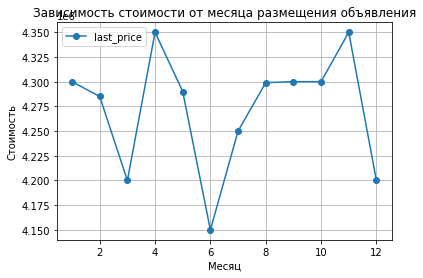

In [44]:
#Месяц объявления
data_1.pivot_table(index='month', values='last_price', aggfunc='median').plot(style='o-', grid=True, title='Зависимость стоимости от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
data_1['month'].corr(data_1['last_price'])

Как можно заметить, стоимость не сильно зависима от месяца выставления на продажу. В самые дорогие апрель и ноябрь, стоимость помещений выше "отпускного" июня на 200 тыс.

-0.0074358000021028

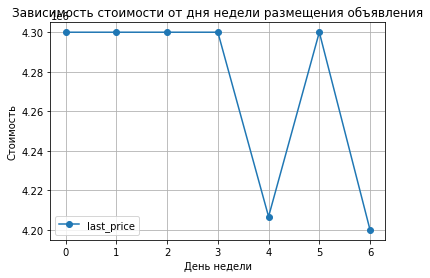

In [45]:
#День недели объявления
data_1.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(style='o-', grid=True, title='Зависимость стоимости от дня недели размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Стоимость')
data_1['weekday'].corr(data_1['last_price'])

В исследуемых параметрах зависимость почти не прослеживается, но исходя из графика, можно предположить, что просмотр объявлений размещенных в пятницу и воскресенье позволит вам сэкономить до 100 тысяч.

### Исследование стоимости помещений в населенных пунктах с наибольшим количеством объявлений.

In [46]:
data_1_pivot = data_1.pivot_table(index= 'locality_name', values= 'price_per_m2', aggfunc=['count', 'mean'])
data_1_pivot.columns = ['Кол-во объявлений', 'Стоимость за кв.м']
data_1_pivot = data_1_pivot.sort_values(by='Кол-во объявлений', ascending=False).head(10)
data_1_pivot = data_1_pivot.sort_values(by='Стоимость за кв.м', ascending=False)
data_1_pivot

,Кол-во объявлений,Стоимость за кв.м
locality_name,,
Санкт-Петербург,11114,103545.340593
Пушкин,266,99601.524868
деревня Кудрово,277,92602.719834
поселок Парголово,292,89472.350768
поселок Мурино,524,85872.485816
поселок Шушары,387,77857.354572
Колпино,291,74716.826825
Гатчина,247,68268.838186
Всеволожск,318,66826.503478


Из полученной и отсортированной, в соответствии с заданием, сводной таблицы можно сделать выводы о том, что почти половина объявлений о продаже помещений в Санкт-Петербурге, где средняя стоимость за кв.м. - 104 тысячи. Завершает десятку лидеров Выборг со 187 объявлениями и 57 тысячами за кв.м.  

### Исследование параметров квартир, расположенных в Санкт-Петербурге и его центре

In [47]:
data_1['km_to_center'] = data_1['cityCenters_nearest'] / 1000
data_1['km_to_center'] = data_1['km_to_center'].apply(np.around)

Добавляем столбец содержащий округленные данные о расстоянии до центра города в километрах.

Text(0, 0.5, 'Стоимость')

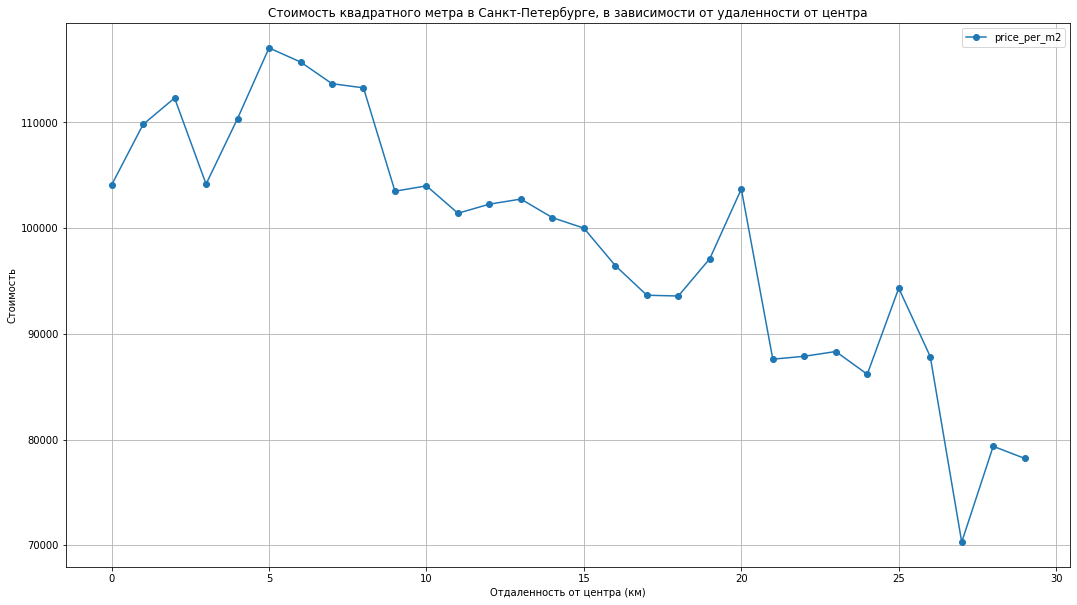

In [48]:
spb_km_to_center = data_1.query('locality_name == "Санкт-Петербург"').pivot_table(index='km_to_center', values='price_per_m2', aggfunc='median')
spb_km_to_center.plot(style='o-', grid=True, figsize=(18,10), title='Стоимость квадратного метра в Санкт-Петербурге, в зависимости от удаленности от центра')
plt.xlabel('Отдаленность от центра (км)')
plt.ylabel('Стоимость')

Созданный график отображает зависимость удаленности от центра города и стоимости квадратного метра в Санкт-Петербурге. Несмотря на то, что в 3 км от центра есть помещения ниже средней стоимости, равно как и в 20 км от центра есть помещения выше средней стоимости, можно обратить внимание на стабильное снижение цен после 8-го километра, что дает нам основания полагать об окончании центральной зоны города на этой границе.

In [49]:
km_mean_price = (spb_km_to_center.max() - spb_km_to_center.min()) / len(spb_km_to_center)
km_mean_price

price_per_m2    1557.765152
dtype: float64

Стоимость цены за квадратный метр в среднем снижается на 1558 рублей за каждый километр удаленности от центра города.

In [50]:
spb = data_1.query('locality_name == "Санкт-Петербург"')
spb_center = spb.query('km_to_center <= 8')
spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().style.format({'last_price': '{:.0f}'})

,total_area,last_price,rooms,ceiling_height
count,11114.000000,11114,11114.000000,11114.000000
mean,53.890347,5548506,1.932608,2.677904
std,18.905965,2265751,0.884519,0.127719
min,13.000000,12190,0.000000,1.000000
25%,39.700000,3950000,1.000000,2.600000
50%,49.900000,4900000,2.000000,2.700000
75%,64.585000,6500000,3.000000,2.700000
max,116.000000,15300000,4.000000,3.150000


In [51]:
spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().style.format({'last_price': '{:.0f}'})

,total_area,last_price,rooms,ceiling_height
count,1813.000000,1813,1813.000000,1813.000000
mean,64.338748,7244931,2.242692,2.763701
std,21.660096,2659638,0.900458,0.157828
min,13.200000,1600000,0.000000,2.400000
25%,46.400000,5250000,2.000000,2.700000
50%,62.000000,6800000,2.000000,2.700000
75%,80.000000,8900000,3.000000,2.820000
max,116.000000,15300000,4.000000,3.150000


Извлекаем основные данные о плоащди, стоимости, количестве комнат и высоте потолков в Санкт-Петербурге и его центральной части.

Text(0, 0.5, 'Количество объявлений')

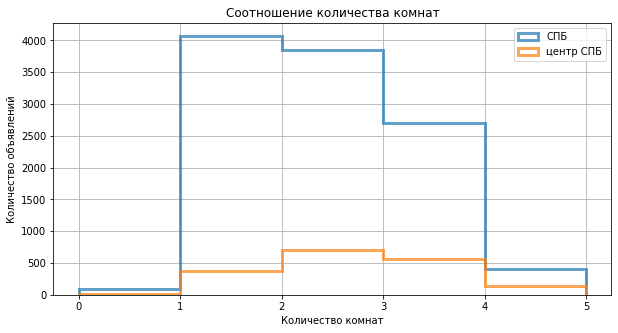

In [52]:
ax = spb.plot(kind='hist', y='rooms', histtype='step', range=(0, 5), bins=5,
    linewidth=3, alpha=0.7, label='СПБ', figsize = (10,5), title='Соотношение количества комнат')
spb_center.plot(kind='hist', y='rooms', histtype='step',range=(0, 5), bins=5,
    linewidth=3, alpha=0.7, label='центр СПБ', ax=ax, grid=True, legend=True)
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')

Из данного графика можно сделать вывод о том, что в центре города чаще продаются помещения с бОльшим количеством комнат, а 4-х комнатные помещения в центре составляют чуть меньше половины подобных объявлений по всему городу.

Text(0, 0.5, 'Количество объявлений')

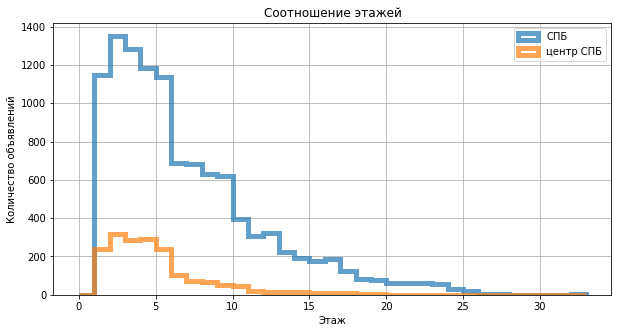

In [53]:
ax = spb.plot(kind='hist', y='floor', histtype='step', range=(0, 33), bins=33,
    linewidth=5, alpha=0.7, label='СПБ', figsize = (10,5), title='Соотношение этажей')
spb_center.plot(kind='hist', y='floor', histtype='step',range=(0, 33), bins=33,
    linewidth=5, alpha=0.7, label='центр СПБ', ax=ax, grid=True, legend=True)
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')

Так как в центральной черте города сосредоточены в основном невысотные здания, основная часть объявлений о продаже помещений в этой части города ограничивается 5-м этажом. По всему городу, также большая часть объявлений - помещения до пятого этажа, однако и имеется значительная часть объявлений вплоть до 25-го этажа.

Text(0, 0.5, 'Количество объявлений')

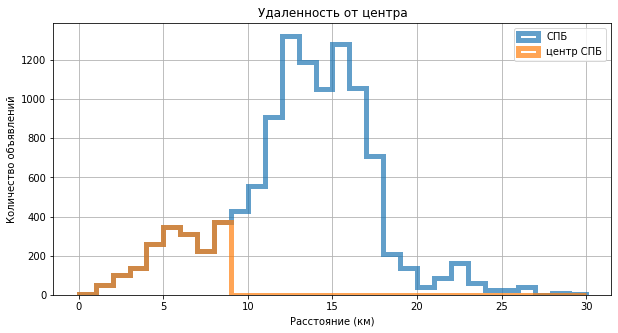

In [54]:
ax = spb.plot(kind='hist', y='km_to_center', histtype='step', range=(0, 30), bins=30,
    linewidth=5, alpha=0.7, label='СПБ', figsize = (10,5),  title='Удаленность от центра')
spb_center.plot(kind='hist', y='km_to_center', histtype='step',range=(0, 30), bins=30,
    linewidth=5, alpha=0.7, label='центр СПБ', ax=ax, grid=True, legend=True)
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество объявлений')

Как нам уже известно из исследования основных показаетлей, продаваемые помещения в центре составляют шестую часть от всех объявлений о продаже по городу, что прекрасно видно на графике. бОльшая часть помещений в центре расположены в 5-8 км удаленности. В городе удаленность основной части продаваемых помещений - 10-17 км.

Text(0, 0.5, 'Количество объявлений')

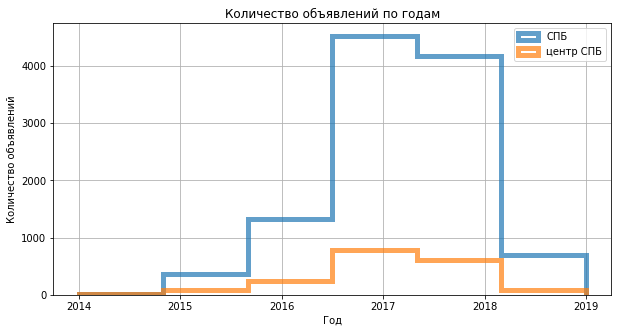

In [55]:
ax = spb.plot(kind='hist', y='year', histtype='step', range=(2014, 2019), bins=6,
    linewidth=5, alpha=0.7, label='СПБ', figsize = (10,5),  title='Количество объявлений по годам')
spb_center.plot(kind='hist', y='year', histtype='step',range=(2014, 2019), bins=6,
    linewidth=5, alpha=0.7, label='центр СПБ', ax=ax, grid=True, legend=True)
plt.xlabel('Год')
plt.ylabel('Количество объявлений')

Данные на графике распределены равномерно относительно друг друга. Больше всего объявлений о продаже было в 2017 и 2018 годах, что взаимосвязано с полученными ранее данными о низкой цене на квартиры в этих годах.

### Вывод

В данном разделе мы установили характеристики помещений, объявления о продаже которых встречаются чаще всего. Чаще всего продаются помещения площадью 30-60 кв.м., стоимостями 50-150 тысяч за квадратный метр, до 10 миллионов за помещение, имеющие 2-4 комнаты, с высотой потолков от 2.5 до 2.7 метров. Продажа помещения всегда происходит за очень разные сроки, как показывает миданной значение это происходит за три мясца. Также было установлено, что основополгающим фактором формирования стоимости помещения является его площадь с корреляцией в 0.75, а дата размещения объявления играет в данном вопросе малую роль. Помимо этого, была установленна центральная зона города и произведено сравнение показателей, продаваемых в ней помещений, с объявлениями о продаже по всему городу. Исходя из полученных данных можно подтвердить теорию о том, что жилье в центре дороже, больше, находится на невысоких этажах и продается реже.

## Общий вывод

Результаты, полученные в ходе исследования, имеют небольшую долю субъективности, так как отсутствует связь с причастными к формированию данных. В данном вопросе очень сложно отделить аномальные показатели от реальных, так как рынок недвижимости крайне разнообразен и на конечную стоимость помещения может влиять огромное количество факторов, не отраженных в предоставленных данных. В свою очередь, для получения результатов, максимально приближенных к реальности, пропуски заполнялись только в тех случаях, когда их можно было сгруппировать с другими параметрами помещения. В иных ситуациях, пропуски были оставлены, потому что их некорректное заполнение могло бы крайне негативно отразиться на результатах исследования. Несмотря на это, результаты исследования оказались крайне информативными, наглядными и не выходят за рамки объективной реальности.